In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [3]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [5]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

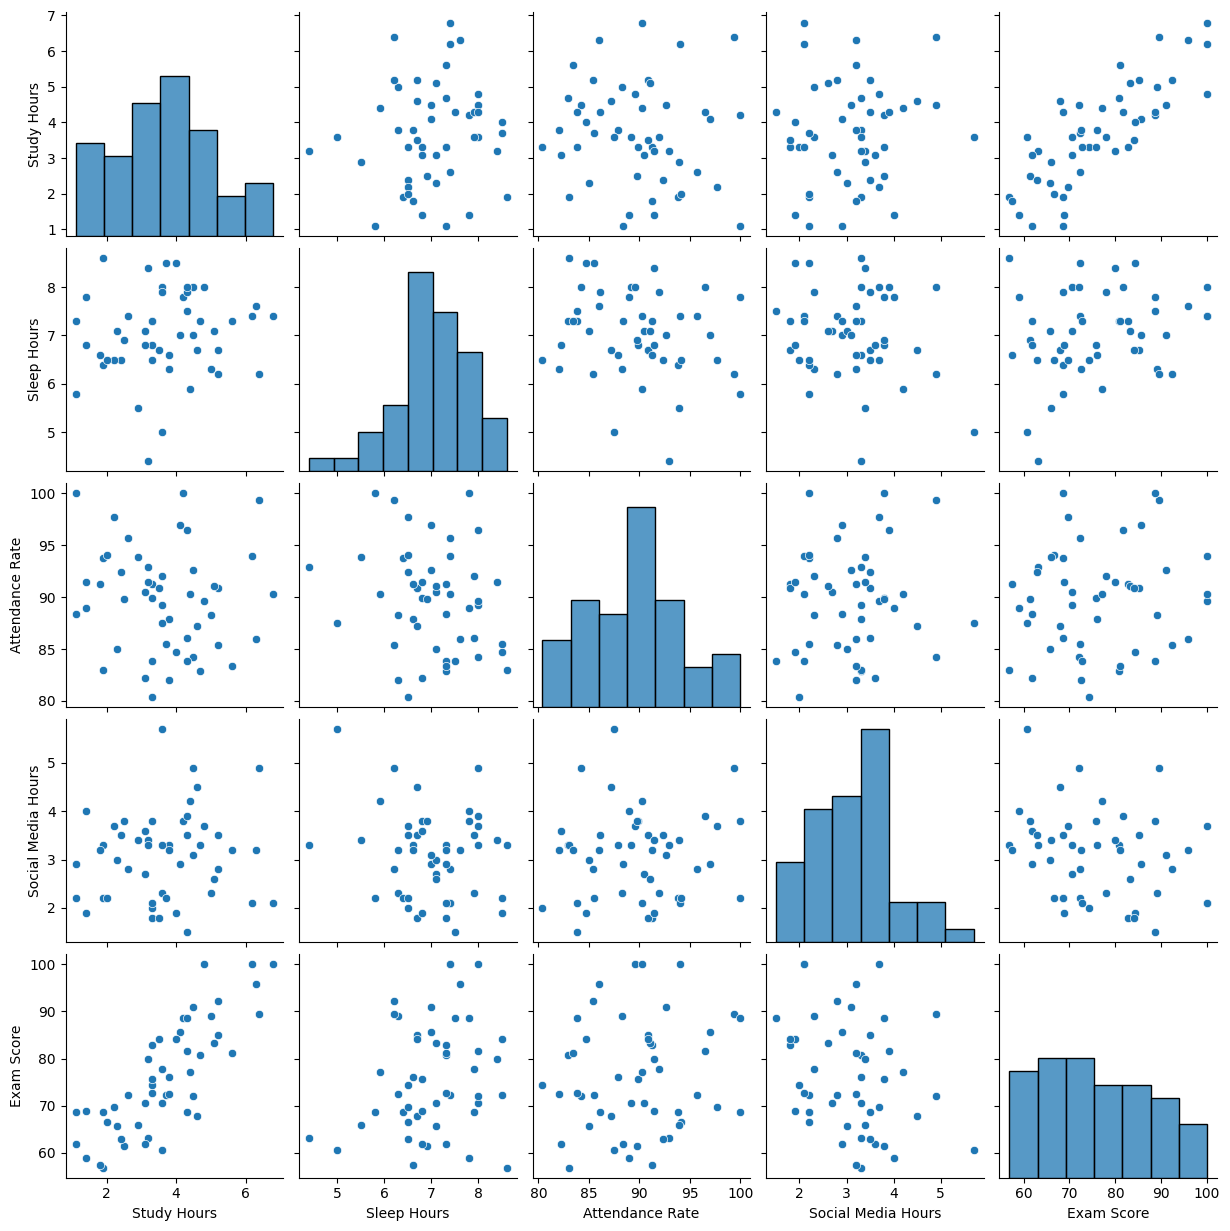

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


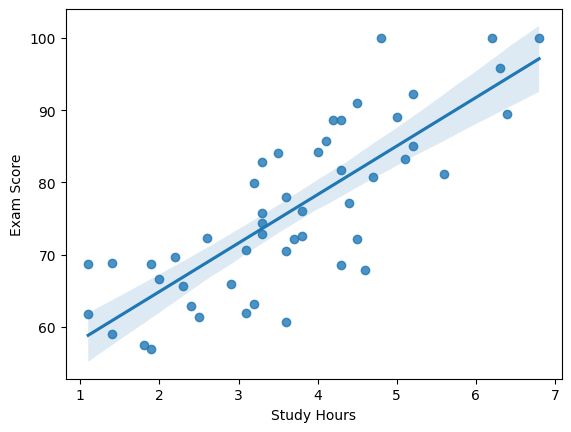

In [8]:
sns.regplot(x = df['Study Hours'], y = df['Exam Score'])
plt.show()

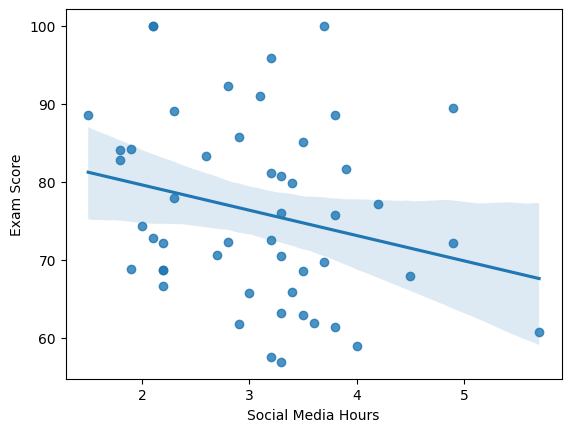

In [9]:
sns.regplot(x = df['Social Media Hours'], y = df['Exam Score'])
plt.show()

In [10]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [36]:
X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
y = df["Exam Score"]

# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [37]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [38]:
# Train - test split

In [39]:
from sklearn.model_selection import train_test_split 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regression = LinearRegression()

In [46]:
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [49]:
new_student = [[5, 7, 90, 4]]


In [50]:
new_student_scaled = scaler.transform(new_student)

c:\Users\AK127381\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
regression.predict(new_student_scaled)

array([82.23465969])

In [54]:
# prediction


In [55]:
y_pred = regression.predict(X_test)

In [56]:
y_pred



array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

MSE: 14.600589378986278, MAE: 3.2770264859627876, RMSE: 3.821071757895457


In [59]:
r2_score = r2_score(y_test, y_pred)

In [60]:
r2_score

0.9156707345772709

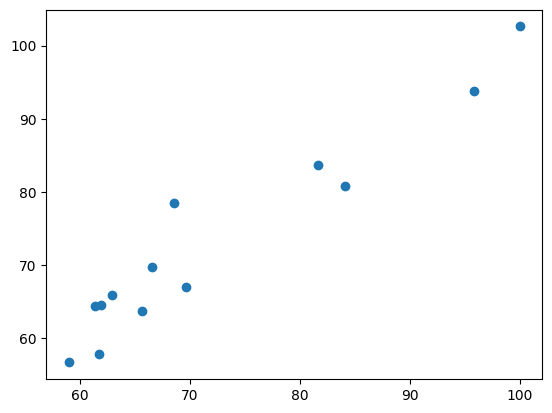

In [61]:
plt.scatter(y_test, y_pred)
plt.show()

In [62]:
regression.intercept_

np.float64(77.41081081081082)

In [63]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])